In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_excel('fr_sp_customers_q1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140117 entries, 0 to 140116
Data columns (total 16 columns):
CUSTOMER_ID      140117 non-null int64
TIER             140117 non-null object
ORDERS           140117 non-null int64
SALES            140117 non-null float64
NET_SALES        140117 non-null float64
BASKET_AVG       140117 non-null float64
CM1              140117 non-null float64
CM1_AVG          140117 non-null float64
CM1%             140116 non-null object
%_NEG_CM1_ORD    140117 non-null float64
LOSS_IN_CM1      140117 non-null float64
CM2              140117 non-null float64
CM2_AVG          140117 non-null float64
CM2%             140116 non-null object
%_NEG_CM2_ORD    140117 non-null float64
LOSS_IN_CM2      140117 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 17.1+ MB


In [4]:
data[['CM1%', 'CM2%']] = data[['CM1%', 'CM2%']].astype(float)

In [5]:
data.sample(10)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
61477,10069635,[53],1,52.24,43.53,52.24,25.14,25.14,57.76,0.0,0.0,17.64,17.64,40.52,0.0,0.00
56610,16790531,[56],2,120.82,100.68,60.41,17.44,8.72,17.33,0.0,0.0,-3.66,-1.83,-3.64,100.0,-3.66
65202,1876291,[52],4,236.23,196.86,59.06,64.73,16.18,32.88,0.0,0.0,36.70,9.17,18.64,0.0,0.00
112852,15835740,[51],5,302.51,252.09,60.50,71.12,14.22,28.21,0.0,0.0,28.79,5.76,11.42,0.0,0.00
48908,14509510,[53],2,169.06,140.88,84.53,17.57,8.79,12.47,0.0,0.0,1.22,0.61,0.87,50.0,-1.10
38928,2504697,[53],2,142.46,118.72,71.23,24.76,12.38,20.85,0.0,0.0,8.24,4.12,6.94,0.0,0.00
39862,15322000,[52],5,241.54,201.28,48.31,45.32,9.06,22.52,0.0,0.0,2.42,0.48,1.20,40.0,-3.66
107211,18602163,[56],1,179.23,149.36,179.23,35.81,35.81,23.97,0.0,0.0,19.11,19.11,12.79,0.0,0.00
69235,2663289,[52],1,61.64,51.37,61.64,30.49,30.49,59.35,0.0,0.0,14.02,14.02,27.29,0.0,0.00
95505,1224484,[54],3,222.88,185.73,74.29,74.21,24.74,39.96,0.0,0.0,49.03,16.34,26.40,0.0,0.00


In [6]:
data['CM2%'].describe()

count    1.401160e+05
mean    -4.521125e+27
std      1.692351e+30
min     -6.334820e+32
25%      4.410000e+00
50%      9.990000e+00
75%      1.643000e+01
max      7.623000e+01
Name: CM2%, dtype: float64

In [7]:
data[['ORDERS', 'BASKET_AVG', 'CM2', 'CM2%']].fillna(0).describe().round(2)

,ORDERS,BASKET_AVG,CM2,CM2%
count,140117.00,140117.00,140117.00,1.401170e+05
mean,1.93,82.68,15.29,-4.521093e+27
std,1.35,46.78,22.10,1.692345e+30
min,1.00,-3.67,-175.39,-6.334820e+32
25%,1.00,51.86,3.38,4.410000e+00
50%,2.00,71.24,9.20,9.990000e+00
75%,2.00,99.87,19.82,1.643000e+01
max,70.00,1588.39,1332.79,7.623000e+01


In [8]:
data['TIER'].unique()

array(['[52]', '[54]', '[ 54 155]', '[ 54 156]', '[52 51]', '[54 53]',
       '[ 52 154]', '[ 52 153]', '[52 54]', '[57]', '[53]', '[56]',
       '[51]', '[51 52]', '[ 53 156]', '[ 53 155]', '[ 51 153]',
       '[51 53]', '[53 54]', '[53 51]', '[56 51]', '[ 51 154]', '[55 52]',
       '[55]', '[56 52]', '[55 51]', '[56 53]', '[51 54]', '[ 56 154]',
       '[ 56 153]', '[ 51 154  54]', '[ 55 153]', '[56 54]', '[56 51 52]',
       '[154]', '[153]', '[153 154]', '[155]', '[156]', '[153  51]',
       '[151]', '[155  53]', '[153  52]', '[155 156]', '[153  53]',
       '[155  54]', '[152]', '[51 56]', '[53 56]', '[154  52]'],
      dtype=object)

In [9]:
selected_tiers = ['[51]',
 '[52]',
 '[53]',
 '[54]',
 '[55]',                 
 '[56]',
 '[153]',
 '[154]',
 '[155]',
 '[156]']
selected_tiers

['[51]',
 '[52]',
 '[53]',
 '[54]',
 '[55]',
 '[56]',
 '[153]',
 '[154]',
 '[155]',
 '[156]']

In [10]:
data = data[data['TIER'].isin(selected_tiers)]

In [11]:
data['CUSTOMER_ID'].nunique()

137779

In [12]:
tiers = [51, 52, 53, 54, 55, 56, 153, 154, 155, 156]

In [13]:
def get_number_from_string(i):
    changes = i.replace('[', '').replace(']', '')
    return int(changes)

In [14]:
data['TIER'] = data['TIER'].map(get_number_from_string)

In [15]:
data.head()

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,1790664,52,1,50.41,42.01,50.41,16.25,16.25,38.68,0.0,0.0,7.37,7.37,17.54,0.00,0.00
1,4055311,52,1,76.59,63.83,76.59,14.07,14.07,22.04,0.0,0.0,4.23,4.23,6.62,0.00,0.00
2,4436799,54,6,406.51,338.76,67.75,80.21,13.37,23.68,0.0,0.0,14.39,2.40,4.25,33.33,-2.07
3,4094385,54,2,199.47,166.22,99.73,64.22,32.11,38.64,0.0,0.0,47.12,23.56,28.35,0.00,0.00
6,6734989,52,1,23.38,19.48,23.38,12.85,12.85,65.97,0.0,0.0,4.35,4.35,22.31,0.00,0.00


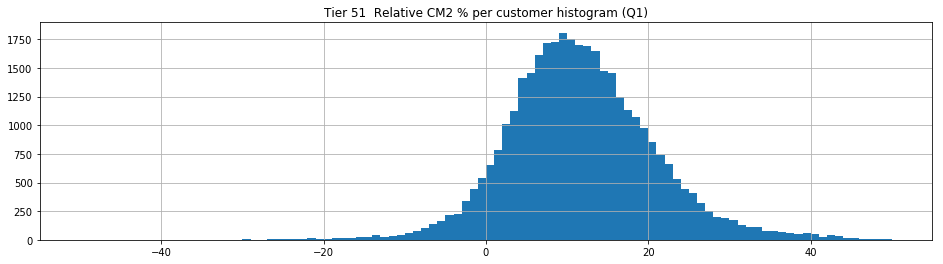

,CM2%
count,35842.000000
mean,11.721425
std,9.201905
min,-175.670000
25%,5.940000
50%,11.140000
75%,16.990000
max,76.230000


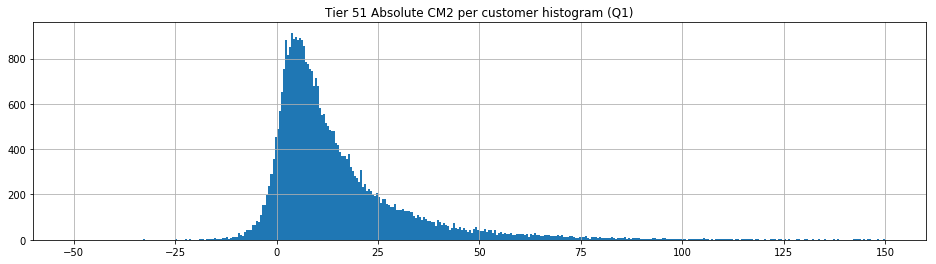

,CM2
count,35842.000000
mean,15.355522
std,19.843516
min,-120.580000
25%,4.240000
50%,9.750000
75%,19.770000
max,479.430000


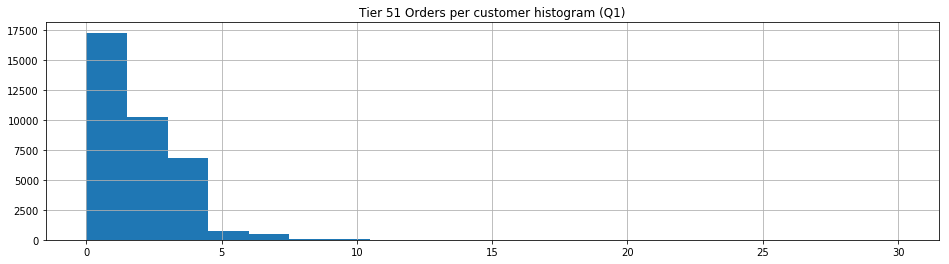

,ORDERS
count,35842.000000
mean,1.935662
std,1.295317
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,21.000000


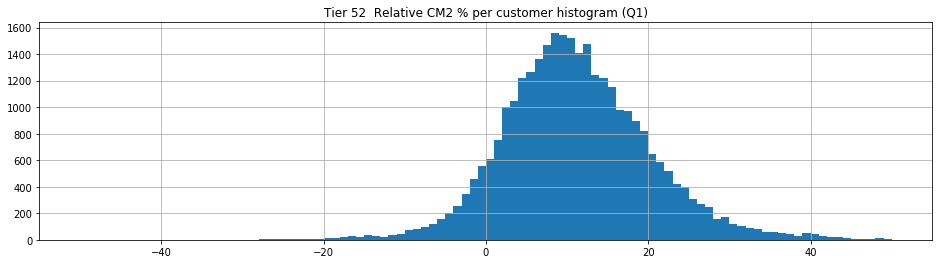

,CM2%
count,3.076200e+04
mean,-2.059300e+28
std,3.611827e+30
min,-6.334820e+32
25%,5.300000e+00
50%,1.057000e+01
75%,1.656000e+01
max,6.980000e+01


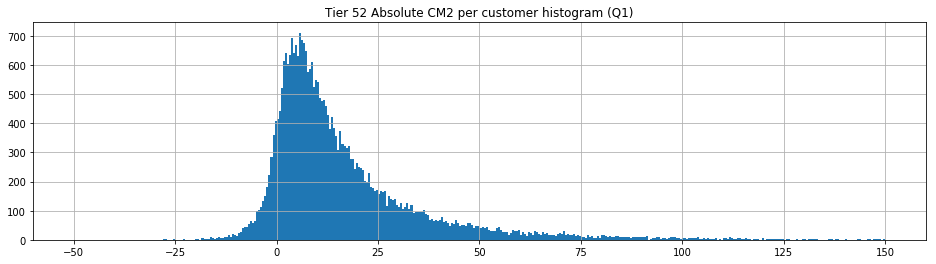

,CM2
count,30762.000000
mean,17.155520
std,24.288345
min,-113.320000
25%,4.370000
50%,10.600000
75%,21.880000
max,1332.790000


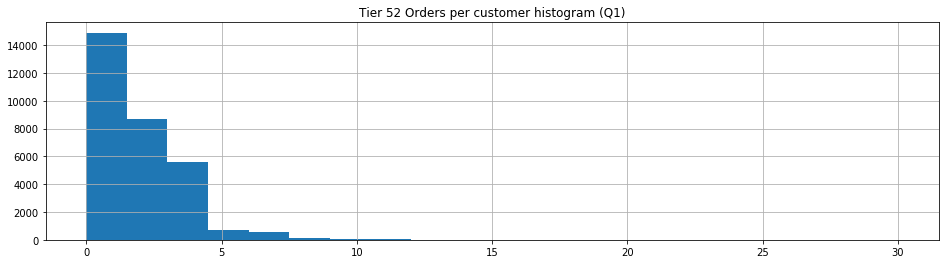

,ORDERS
count,30762.000000
mean,1.965769
std,1.445374
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,70.000000


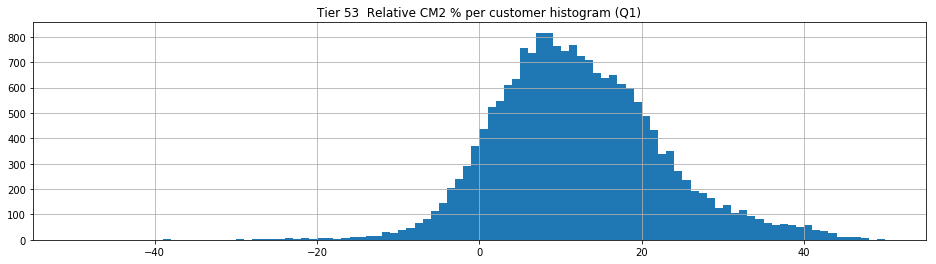

,CM2%
count,18883.000000
mean,12.149269
std,11.376794
min,-618.580000
25%,5.200000
50%,11.310000
75%,18.410000
max,64.880000


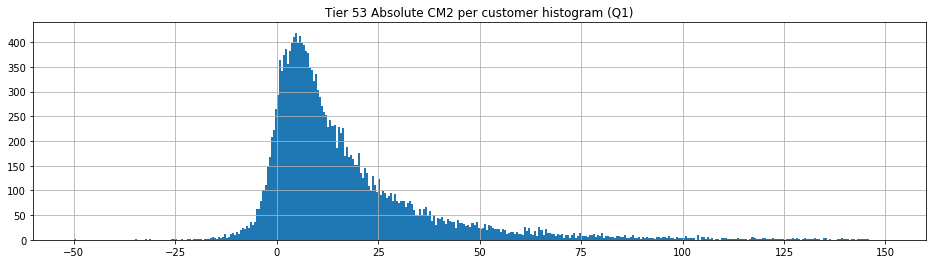

,CM2
count,18883.000000
mean,17.005048
std,22.891263
min,-110.250000
25%,4.040000
50%,10.370000
75%,22.145000
max,388.760000


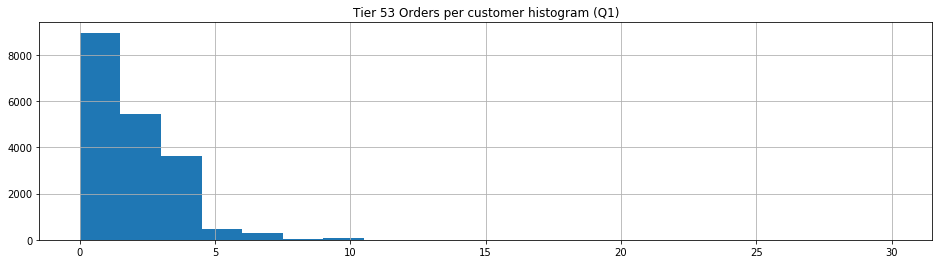

,ORDERS
count,18883.000000
mean,1.976063
std,1.379123
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,28.000000


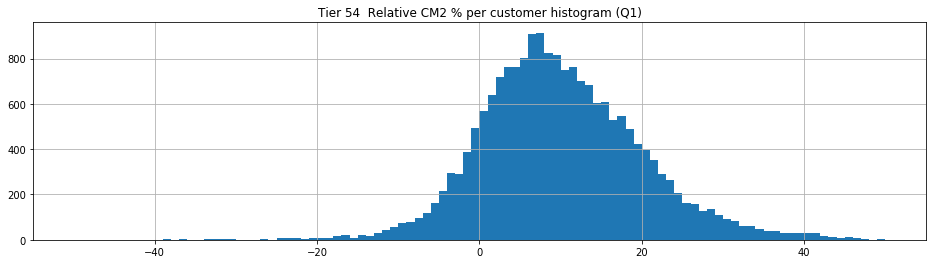

,CM2%
count,19178.000000
mean,10.080275
std,10.295267
min,-276.470000
25%,3.520000
50%,9.210000
75%,16.090000
max,69.280000


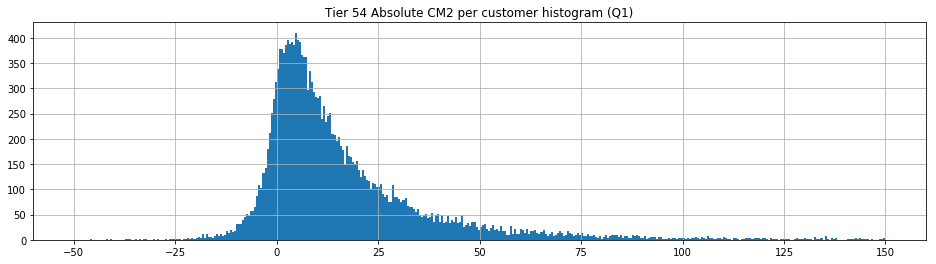

,CM2
count,19178.000000
mean,16.819655
std,25.791880
min,-175.390000
25%,3.060000
50%,9.770000
75%,22.150000
max,768.560000


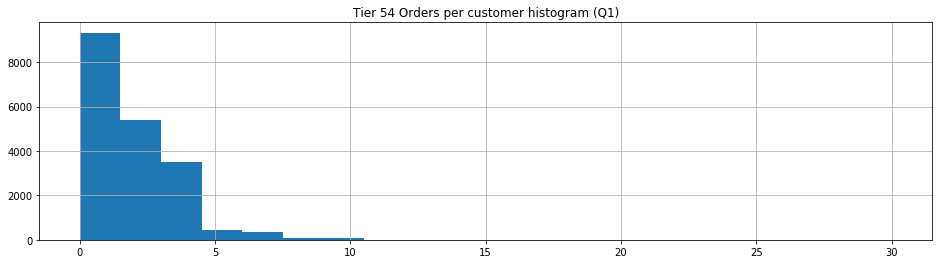

,ORDERS
count,19178.000000
mean,1.975023
std,1.437311
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,23.000000


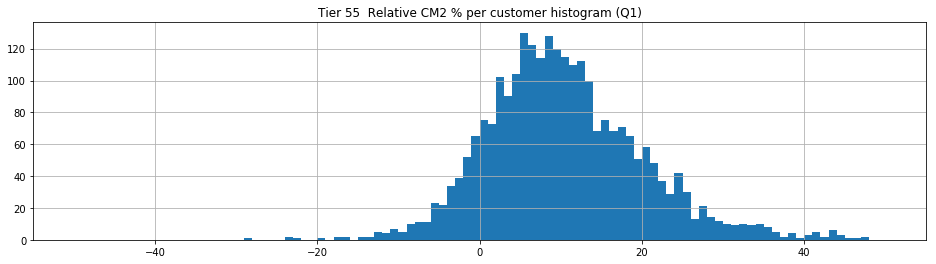

,CM2%
count,2592.000000
mean,10.451065
std,9.738297
min,-28.220000
25%,4.057500
50%,9.430000
75%,16.055000
max,56.040000


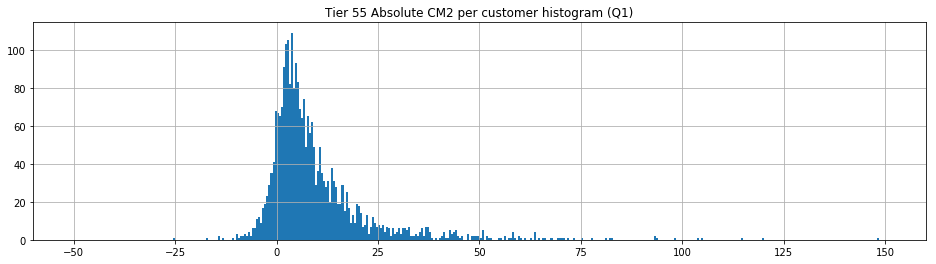

,CM2
count,2592.000000
mean,9.826319
std,16.353394
min,-25.380000
25%,2.260000
50%,5.870000
75%,12.452500
max,445.540000


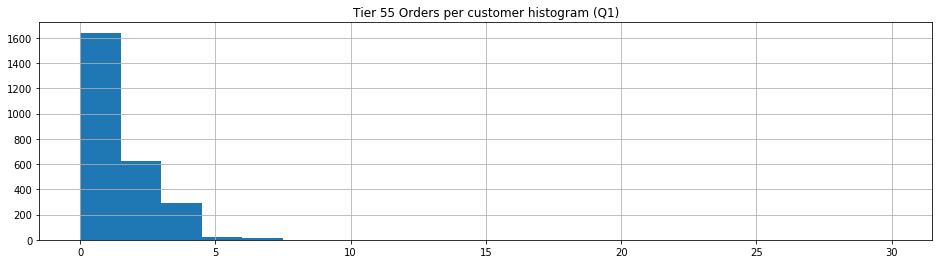

,ORDERS
count,2592.000000
mean,1.553627
std,0.899536
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,10.000000


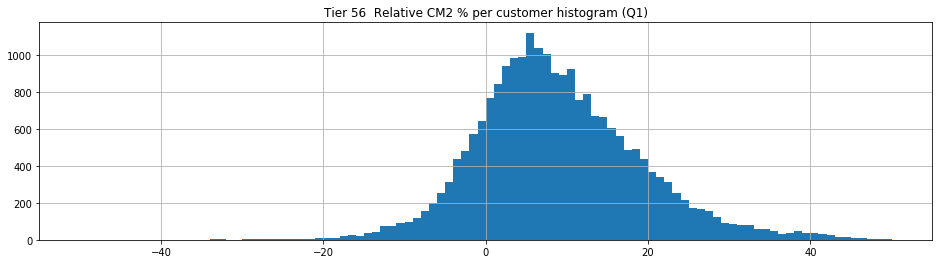

,CM2%
count,22512.000000
mean,8.873803
std,10.355680
min,-240.930000
25%,2.290000
50%,7.830000
75%,14.780000
max,63.500000


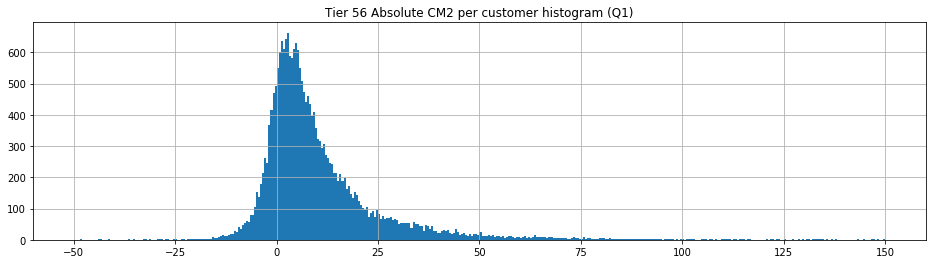

,CM2
count,22513.000000
mean,10.613181
std,16.582511
min,-64.740000
25%,1.580000
50%,6.210000
75%,14.270000
max,308.060000


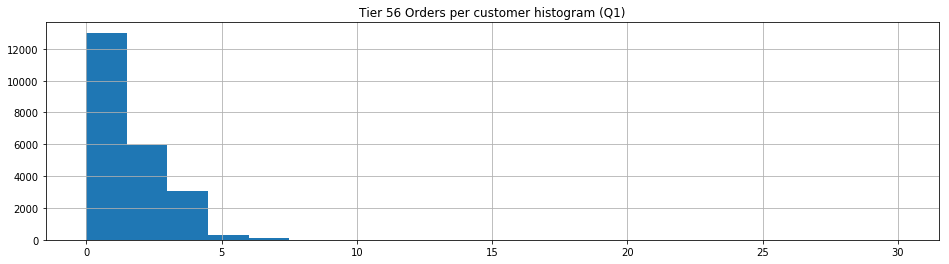

,ORDERS
count,22513.000000
mean,1.664461
std,1.001406
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,13.000000


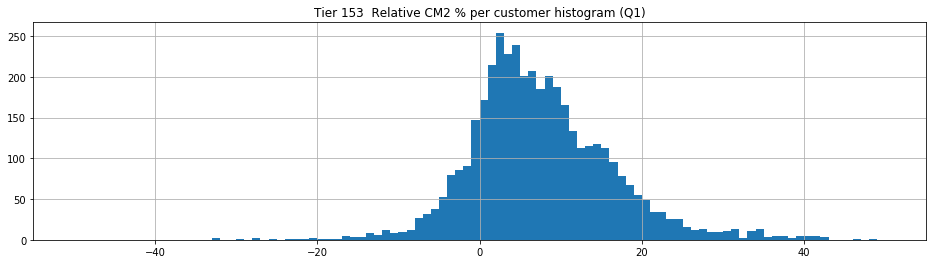

,CM2%
count,4091.000000
mean,7.547553
std,8.969551
min,-95.530000
25%,2.010000
50%,6.450000
75%,12.410000
max,50.600000


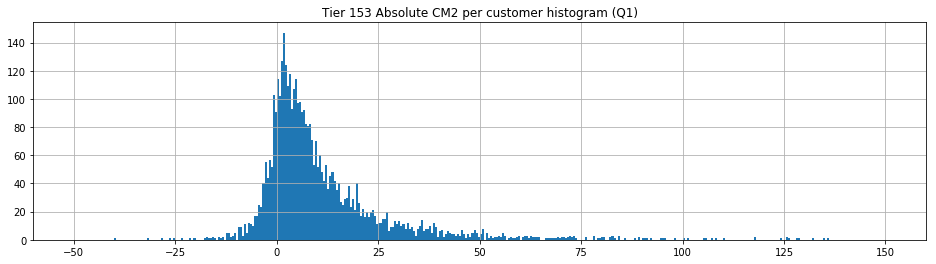

,CM2
count,4091.000000
mean,11.675263
std,19.768634
min,-39.750000
25%,1.670000
50%,6.350000
75%,14.995000
max,350.390000


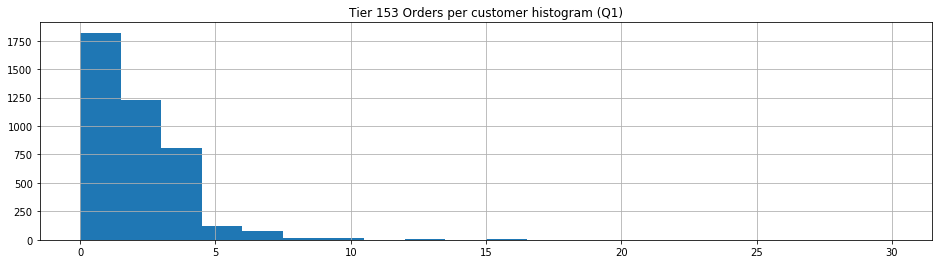

,ORDERS
count,4091.000000
mean,2.065999
std,1.533822
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,24.000000


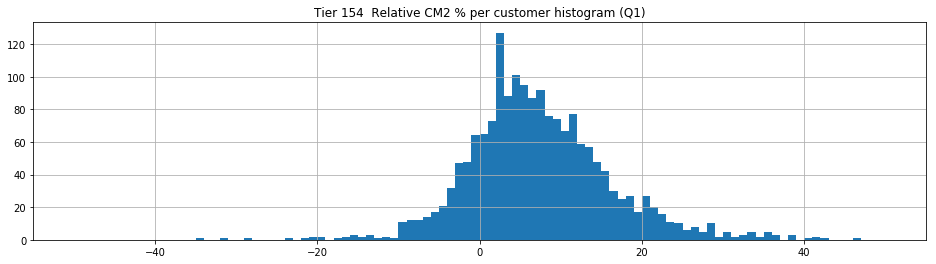

,CM2%
count,1777.000000
mean,7.353804
std,8.873784
min,-34.030000
25%,2.030000
50%,6.500000
75%,12.140000
max,46.230000


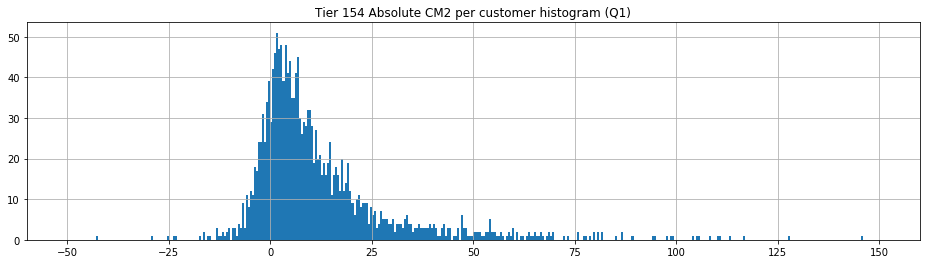

,CM2
count,1777.000000
mean,13.317389
std,22.982622
min,-42.820000
25%,1.780000
50%,6.900000
75%,16.830000
max,327.160000


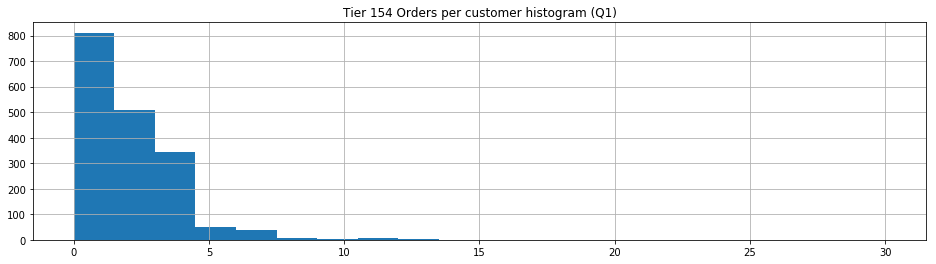

,ORDERS
count,1777.000000
mean,2.088914
std,1.567539
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,17.000000


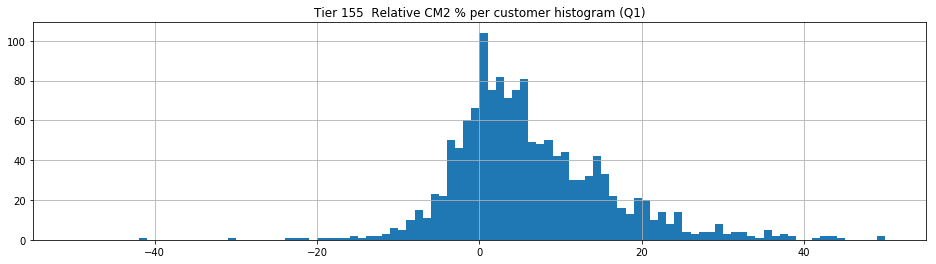

,CM2%
count,1416.000000
mean,6.299492
std,9.624414
min,-41.250000
25%,0.277500
50%,4.680000
75%,11.190000
max,49.920000


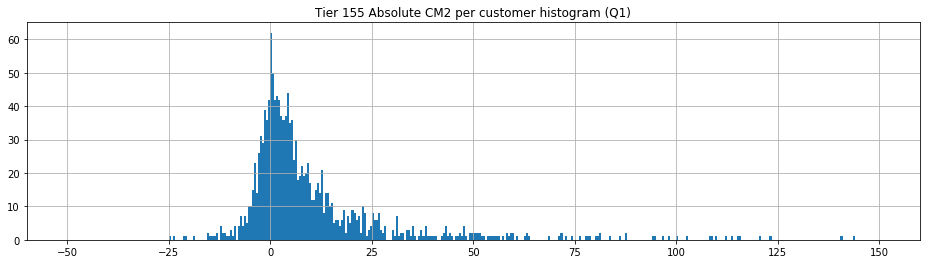

,CM2
count,1416.000000
mean,10.303679
std,20.808559
min,-51.340000
25%,0.220000
50%,4.265000
75%,12.570000
max,220.560000


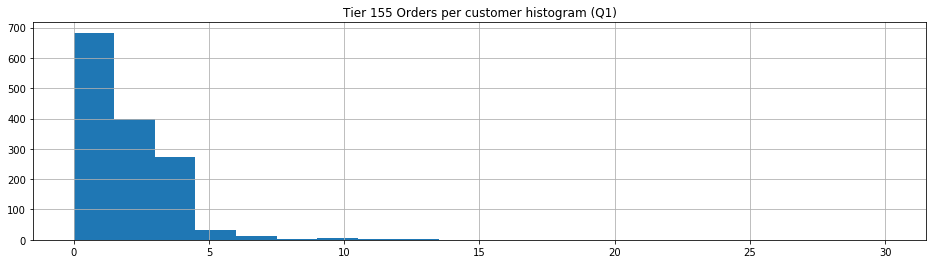

,ORDERS
count,1416.000000
mean,1.960452
std,1.377709
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,12.000000


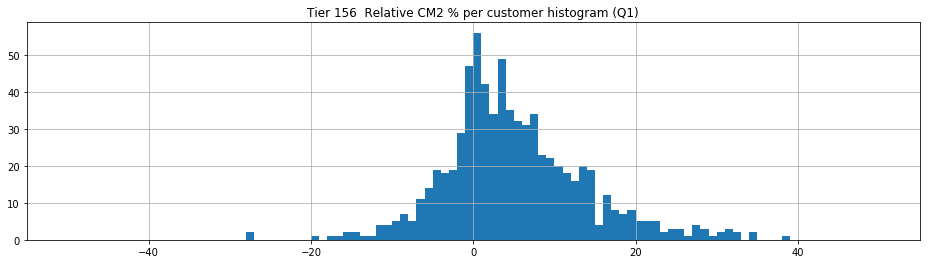

,CM2%
count,725.000000
mean,5.037021
std,8.741274
min,-27.910000
25%,-0.230000
50%,3.750000
75%,9.750000
max,38.830000


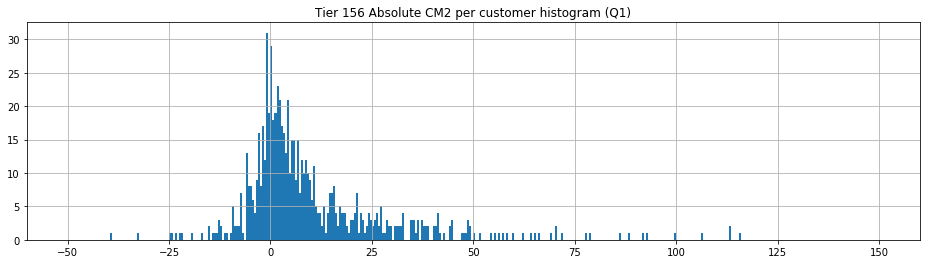

,CM2
count,725.000000
mean,10.667366
std,24.609232
min,-95.990000
25%,-0.200000
50%,4.250000
75%,14.990000
max,298.840000


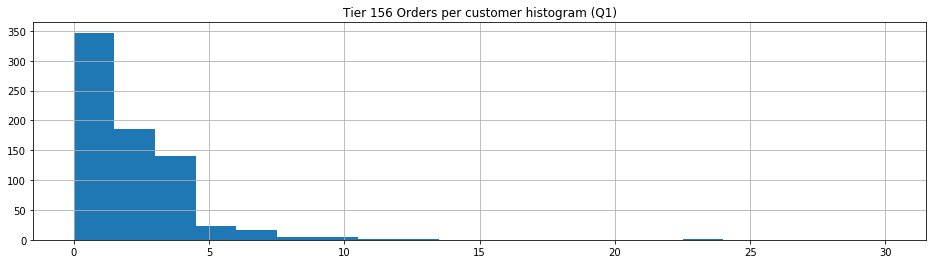

,ORDERS
count,725.000000
mean,2.115862
std,1.751979
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,23.000000


In [16]:
for tq in tiers:
    data_tier = data[data['TIER'] == tq]
    
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].describe()))
        
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))

In [17]:
data_simulation = data.copy()

In [18]:
data_simulation['ORDERS'] = data_simulation['ORDERS'] * 3
data_simulation['CM2'] = data_simulation['CM2'] * 3

In [19]:
sim = data_simulation[['CUSTOMER_ID', 'TIER', 'ORDERS', 'CM2', 'CM2%']]

...........................................................TIER  51 ..........................................................


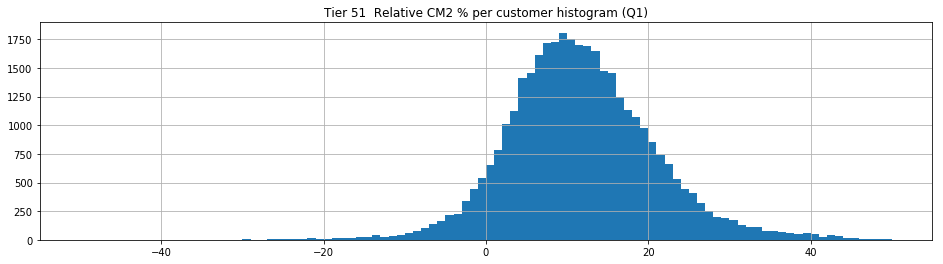

,CM2%
count,35842.000000
mean,11.721425
std,9.201905
min,-175.670000
25%,5.940000
50%,11.140000
75%,16.990000
max,76.230000


CM2% threshold >= 5  is the percentile 21.18
CM2% threshold >= 7  is the percentile 29.75
CM2% threshold >=  7.042999999999992  is the percentile 30 allowing us to stay with the 70% of our sample


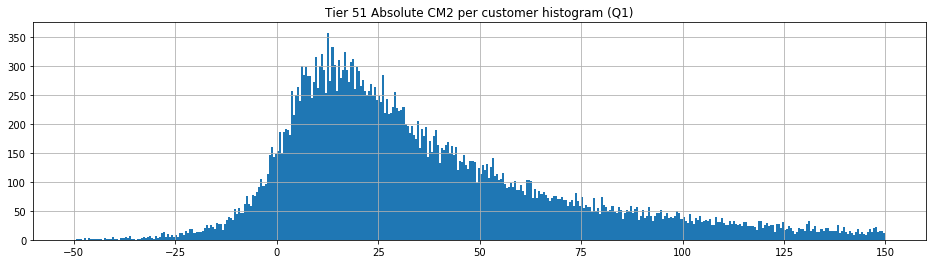

,CM2
count,35842.000000
mean,46.066567
std,59.530548
min,-361.740000
25%,12.720000
50%,29.250000
75%,59.310000
max,1438.290000


15.690000000000001  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  15.690000000000001  we keep eligible a  67.89  % from our customers
With CM2% threshold >= 7 and CM2 >=  15.690000000000001  we keep eligible a  63.38  % from our customers
With CM2% threshold >=  7.042999999999992  and CM2 >=  15.690000000000001  we keep eligible a  63.22  % from our customers


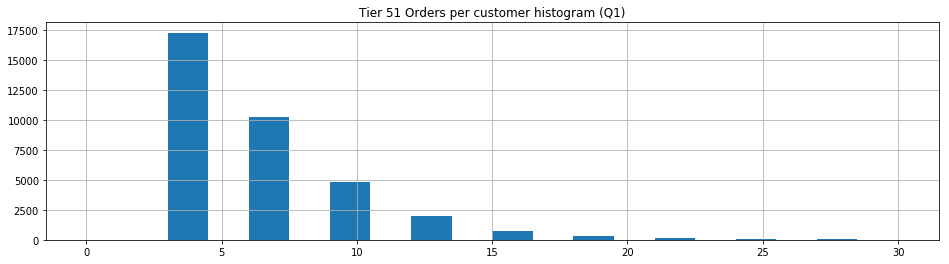

,ORDERS
count,35842.000000
mean,5.806986
std,3.885950
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,63.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  78.82  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  70.25  % from our customers
With CM2% threshold >=  7.042999999999992  and Orders >=  3.0  we keep eligible a  70.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


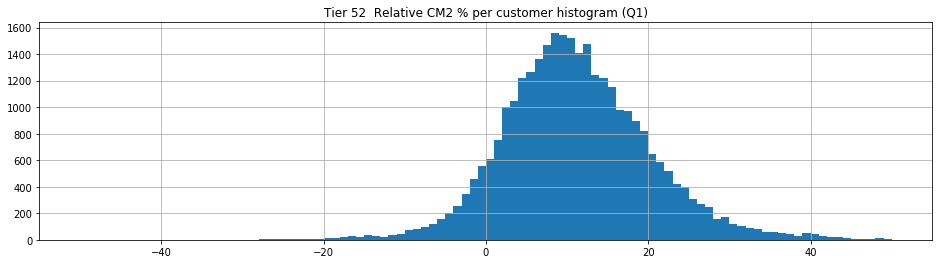

,CM2%
count,3.076200e+04
mean,-2.059300e+28
std,3.611827e+30
min,-6.334820e+32
25%,5.300000e+00
50%,1.057000e+01
75%,1.656000e+01
max,6.980000e+01


CM2% threshold >= 5  is the percentile 23.71
CM2% threshold >= 7  is the percentile 32.26
CM2% threshold >=  6.51  is the percentile 30 allowing us to stay with the 70% of our sample


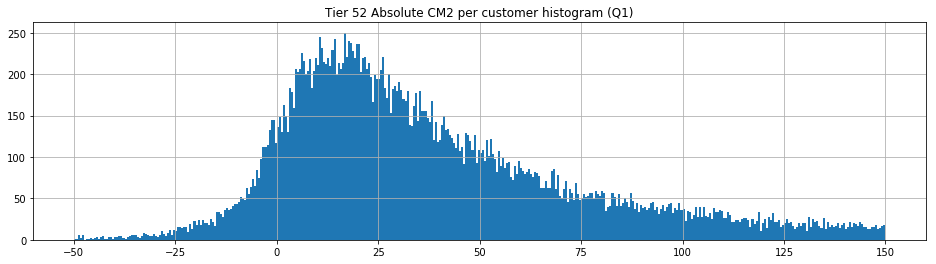

,CM2
count,30762.000000
mean,51.466561
std,72.865036
min,-339.960000
25%,13.110000
50%,31.800000
75%,65.640000
max,3998.370000


16.59  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  16.59  we keep eligible a  67.23  % from our customers
With CM2% threshold >= 7 and CM2 >=  16.59  we keep eligible a  62.21  % from our customers
With CM2% threshold >=  6.51  and CM2 >=  16.59  we keep eligible a  63.8  % from our customers


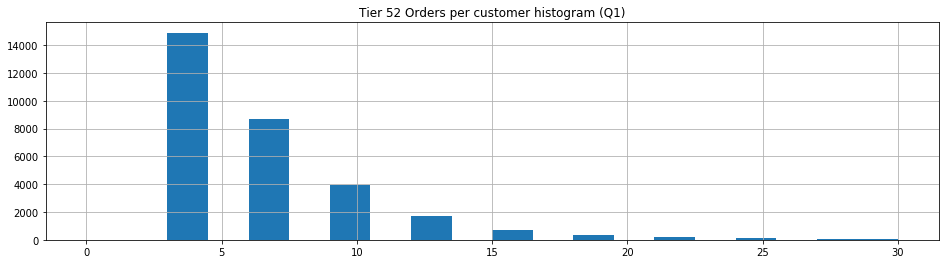

,ORDERS
count,30762.000000
mean,5.897308
std,4.336121
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,210.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  76.29  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  67.74  % from our customers
With CM2% threshold >=  6.51  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


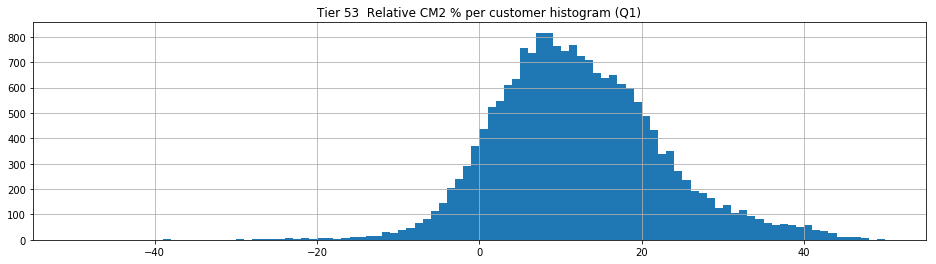

,CM2%
count,18883.000000
mean,12.149269
std,11.376794
min,-618.580000
25%,5.200000
50%,11.310000
75%,18.410000
max,64.880000


CM2% threshold >= 5  is the percentile 23.98
CM2% threshold >= 7  is the percentile 31.88
CM2% threshold >=  6.51  is the percentile 30 allowing us to stay with the 70% of our sample


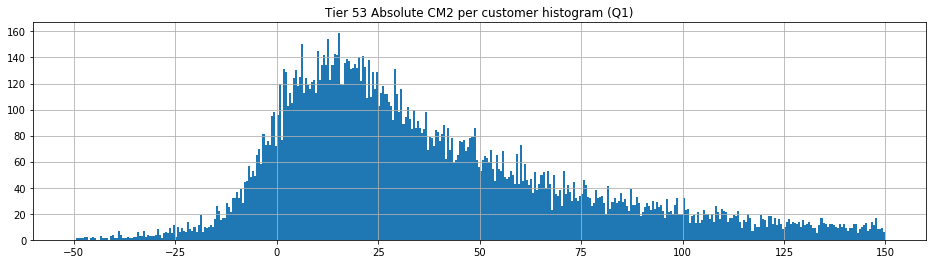

,CM2
count,18883.000000
mean,51.015144
std,68.673790
min,-330.750000
25%,12.120000
50%,31.110000
75%,66.435000
max,1166.280000


15.510000000000002  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  15.510000000000002  we keep eligible a  67.31  % from our customers
With CM2% threshold >= 7 and CM2 >=  15.510000000000002  we keep eligible a  62.79  % from our customers
With CM2% threshold >=  6.51  and CM2 >=  15.510000000000002  we keep eligible a  63.94  % from our customers


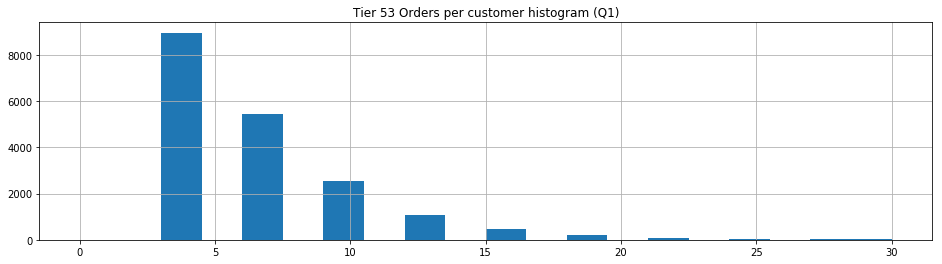

,ORDERS
count,18883.000000
mean,5.928189
std,4.137368
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,84.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  76.02  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  68.12  % from our customers
With CM2% threshold >=  6.51  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


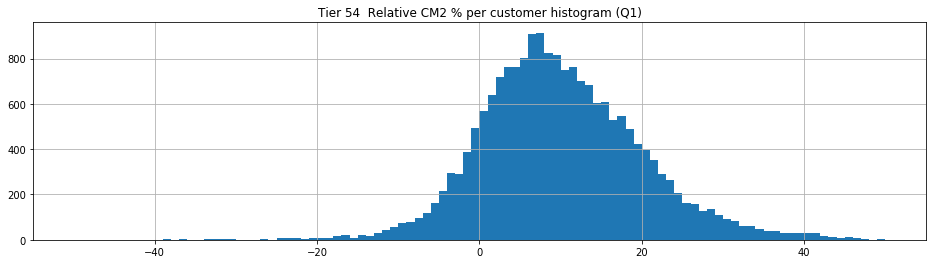

,CM2%
count,19178.000000
mean,10.080275
std,10.295267
min,-276.470000
25%,3.520000
50%,9.210000
75%,16.090000
max,69.280000


CM2% threshold >= 5  is the percentile 31.04
CM2% threshold >= 7  is the percentile 39.96
CM2% threshold >=  4.74  is the percentile 30 allowing us to stay with the 70% of our sample


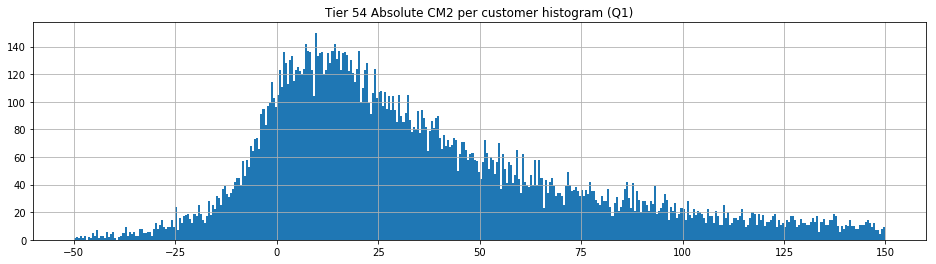

,CM2
count,19178.000000
mean,50.458964
std,77.375639
min,-526.170000
25%,9.180000
50%,29.310000
75%,66.450000
max,2305.680000


12.870000000000001  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  12.870000000000001  we keep eligible a  64.62  % from our customers
With CM2% threshold >= 7 and CM2 >=  12.870000000000001  we keep eligible a  57.83  % from our customers
With CM2% threshold >=  4.74  and CM2 >=  12.870000000000001  we keep eligible a  65.28  % from our customers


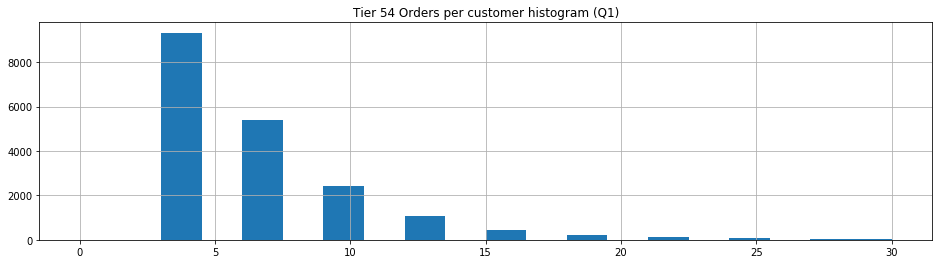

,ORDERS
count,19178.000000
mean,5.925070
std,4.311932
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,69.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  68.96  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  60.04  % from our customers
With CM2% threshold >=  4.74  and Orders >=  3.0  we keep eligible a  70.03  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


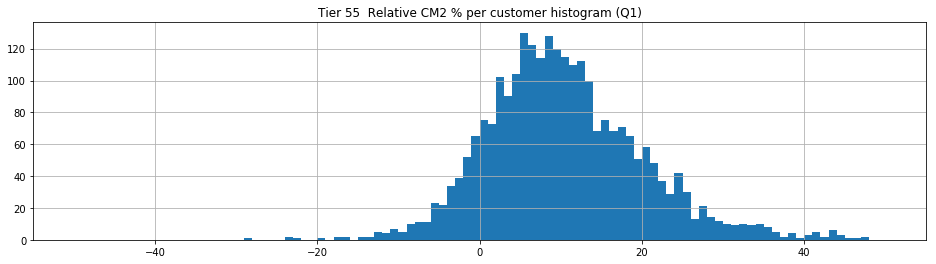

,CM2%
count,2592.000000
mean,10.451065
std,9.738297
min,-28.220000
25%,4.057500
50%,9.430000
75%,16.055000
max,56.040000


CM2% threshold >= 5  is the percentile 28.74
CM2% threshold >= 7  is the percentile 38.46
CM2% threshold >=  5.23  is the percentile 30 allowing us to stay with the 70% of our sample


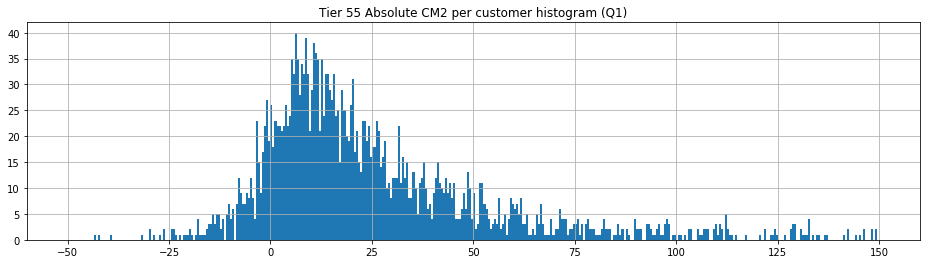

,CM2
count,2592.000000
mean,29.478958
std,49.060182
min,-76.140000
25%,6.780000
50%,17.610000
75%,37.357500
max,1336.620000


8.738999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  8.738999999999999  we keep eligible a  65.7  % from our customers
With CM2% threshold >= 7 and CM2 >=  8.738999999999999  we keep eligible a  59.61  % from our customers
With CM2% threshold >=  5.23  and CM2 >=  8.738999999999999  we keep eligible a  65.12  % from our customers


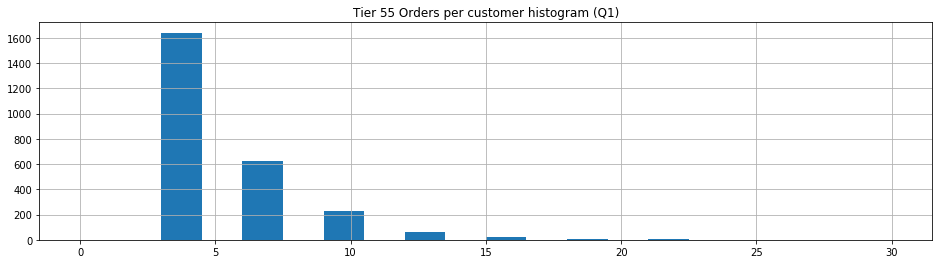

,ORDERS
count,2592.000000
mean,4.660880
std,2.698608
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,30.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  71.26  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  61.54  % from our customers
With CM2% threshold >=  5.23  and Orders >=  3.0  we keep eligible a  70.02  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


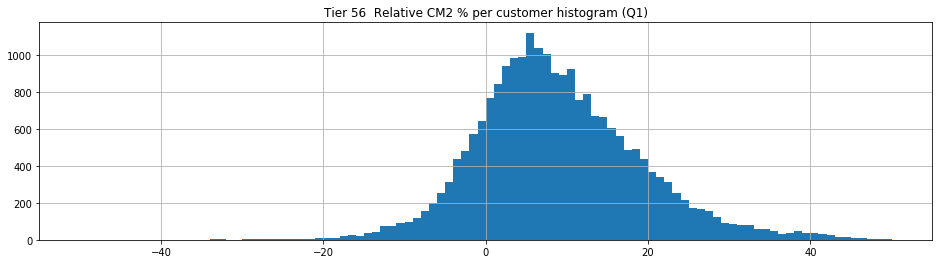

,CM2%
count,22513.000000
mean,8.873409
std,10.355618
min,-240.930000
25%,2.290000
50%,7.830000
75%,14.780000
max,63.500000


C:\Users\albertoma\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1796: RuntimeWarning: invalid value encountered in less
  return np.sum(a < score) / float(n) * 100


CM2% threshold >= 5  is the percentile 36.72
CM2% threshold >= 7  is the percentile 46.29
CM2% threshold >=  3.46  is the percentile 30 allowing us to stay with the 70% of our sample


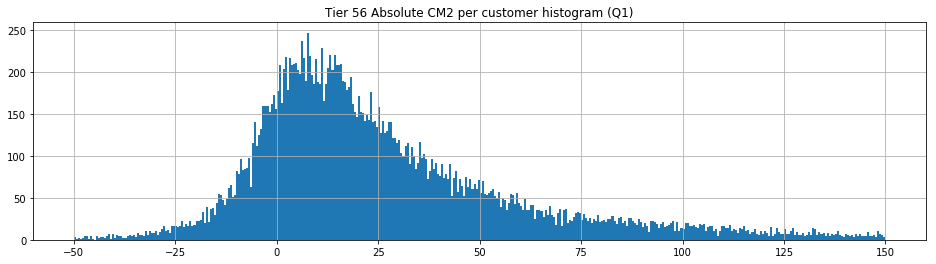

,CM2
count,22513.000000
mean,31.839542
std,49.747532
min,-194.220000
25%,4.740000
50%,18.630000
75%,42.810000
max,924.180000


7.41  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  7.41  we keep eligible a  61.84  % from our customers
With CM2% threshold >= 7 and CM2 >=  7.41  we keep eligible a  53.32  % from our customers
With CM2% threshold >=  3.46  and CM2 >=  7.41  we keep eligible a  66.88  % from our customers


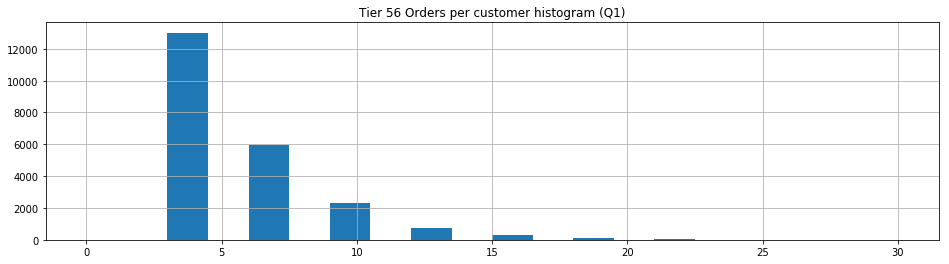

,ORDERS
count,22513.000000
mean,4.993382
std,3.004217
min,3.000000
25%,3.000000
50%,3.000000
75%,6.000000
max,39.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  63.28  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  53.71  % from our customers
With CM2% threshold >=  3.46  and Orders >=  3.0  we keep eligible a  70.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  153 ..........................................................


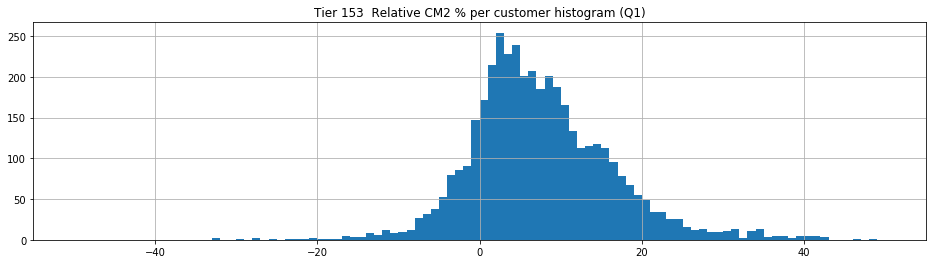

,CM2%
count,4091.000000
mean,7.547553
std,8.969551
min,-95.530000
25%,2.010000
50%,6.450000
75%,12.410000
max,50.600000


CM2% threshold >= 5  is the percentile 42.58
CM2% threshold >= 7  is the percentile 52.55
CM2% threshold >=  2.76  is the percentile 30 allowing us to stay with the 70% of our sample


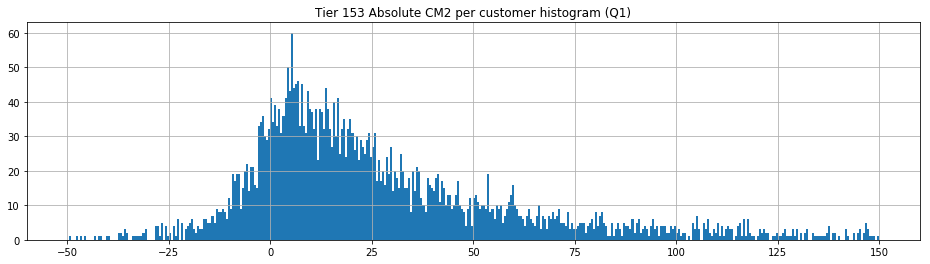

,CM2
count,4091.000000
mean,35.025788
std,59.305903
min,-119.250000
25%,5.010000
50%,19.050000
75%,44.985000
max,1051.170000


7.199999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  7.199999999999999  we keep eligible a  56.81  % from our customers
With CM2% threshold >= 7 and CM2 >=  7.199999999999999  we keep eligible a  47.32  % from our customers
With CM2% threshold >=  2.76  and CM2 >=  7.199999999999999  we keep eligible a  66.73  % from our customers


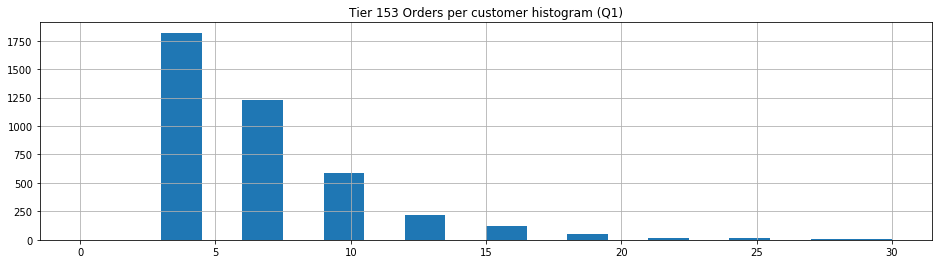

,ORDERS
count,4091.000000
mean,6.197996
std,4.601467
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,72.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  57.42  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  47.45  % from our customers
With CM2% threshold >=  2.76  and Orders >=  3.0  we keep eligible a  70.01  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  154 ..........................................................


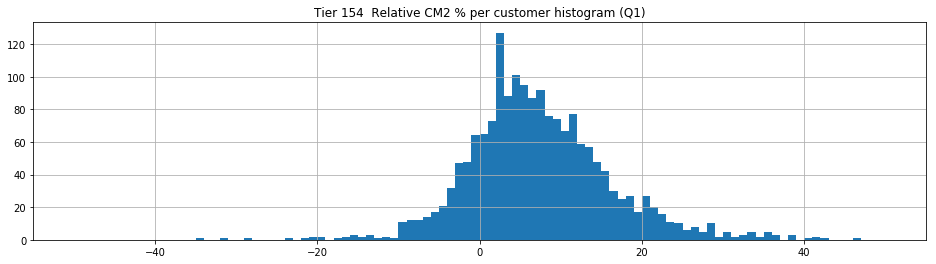

,CM2%
count,1777.000000
mean,7.353804
std,8.873784
min,-34.030000
25%,2.030000
50%,6.500000
75%,12.140000
max,46.230000


CM2% threshold >= 5  is the percentile 42.54
CM2% threshold >= 7  is the percentile 52.79
CM2% threshold >=  2.698  is the percentile 30 allowing us to stay with the 70% of our sample


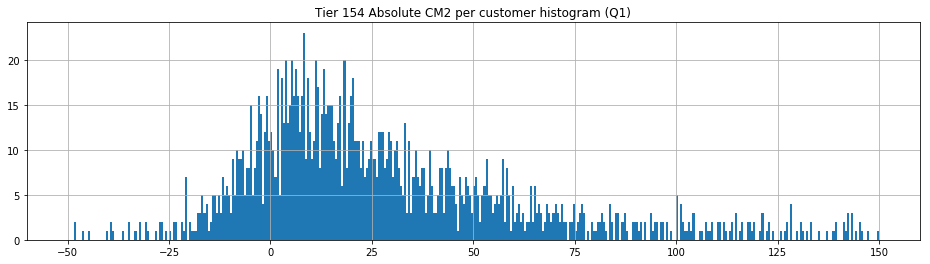

,CM2
count,1777.000000
mean,39.952167
std,68.947867
min,-128.460000
25%,5.340000
50%,20.700000
75%,50.490000
max,981.480000


8.003999999999998  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  8.003999999999998  we keep eligible a  56.78  % from our customers
With CM2% threshold >= 7 and CM2 >=  8.003999999999998  we keep eligible a  46.93  % from our customers
With CM2% threshold >=  2.698  and CM2 >=  8.003999999999998  we keep eligible a  66.29  % from our customers


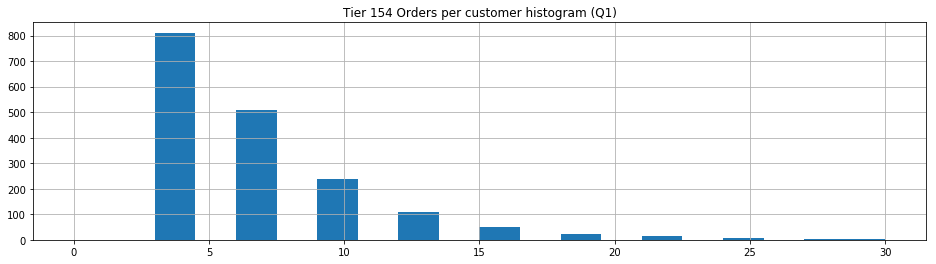

,ORDERS
count,1777.000000
mean,6.266742
std,4.702618
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,51.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  57.46  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  47.21  % from our customers
With CM2% threshold >=  2.698  and Orders >=  3.0  we keep eligible a  70.01  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  155 ..........................................................


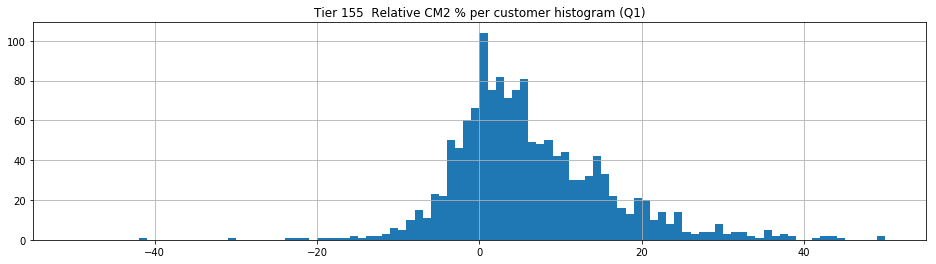

,CM2%
count,1416.000000
mean,6.299492
std,9.624414
min,-41.250000
25%,0.277500
50%,4.680000
75%,11.190000
max,49.920000


CM2% threshold >= 5  is the percentile 52.26
CM2% threshold >= 7  is the percentile 61.44
CM2% threshold >=  0.855  is the percentile 30 allowing us to stay with the 70% of our sample


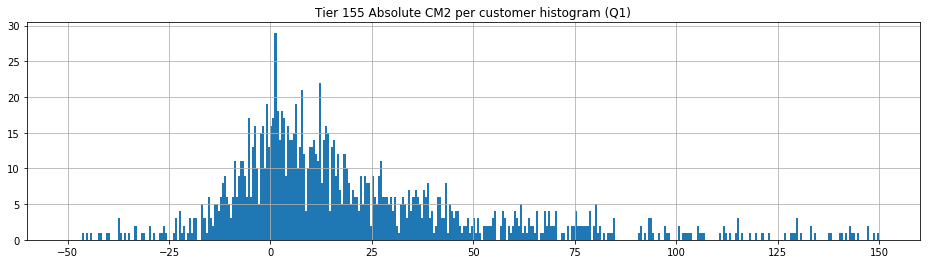

,CM2
count,1416.000000
mean,30.911038
std,62.425678
min,-154.020000
25%,0.660000
50%,12.795000
75%,37.710000
max,661.680000


2.43  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  2.43  we keep eligible a  47.74  % from our customers
With CM2% threshold >= 7 and CM2 >=  2.43  we keep eligible a  38.56  % from our customers
With CM2% threshold >=  0.855  and CM2 >=  2.43  we keep eligible a  68.64  % from our customers


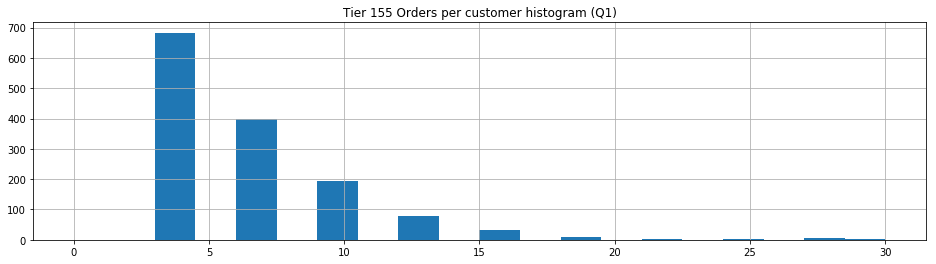

,ORDERS
count,1416.000000
mean,5.881356
std,4.133126
min,3.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,36.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  47.74  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  38.56  % from our customers
With CM2% threshold >=  0.855  and Orders >=  3.0  we keep eligible a  69.99  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  156 ..........................................................


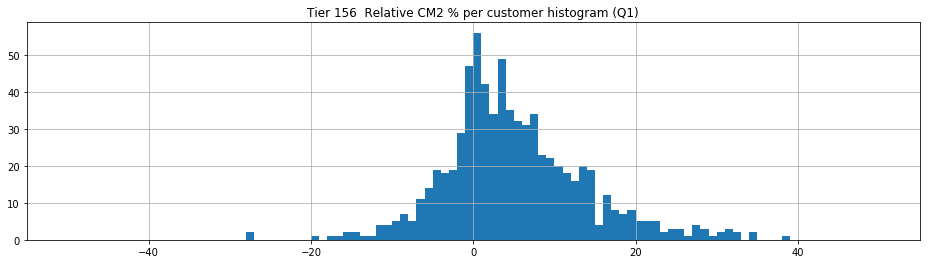

,CM2%
count,725.000000
mean,5.037021
std,8.741274
min,-27.910000
25%,-0.230000
50%,3.750000
75%,9.750000
max,38.830000


CM2% threshold >= 5  is the percentile 56.41
CM2% threshold >= 7  is the percentile 65.1
CM2% threshold >=  0.4259999999999996  is the percentile 30 allowing us to stay with the 70% of our sample


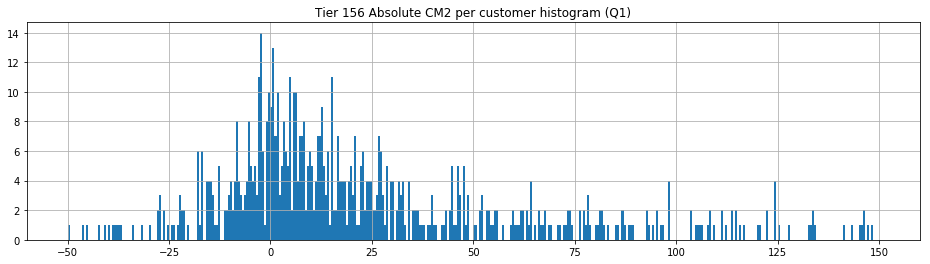

,CM2
count,725.000000
mean,32.002097
std,73.827696
min,-287.970000
25%,-0.600000
50%,12.750000
75%,44.970000
max,896.520000


1.1099999999999999  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and CM2 >=  1.1099999999999999  we keep eligible a  43.59  % from our customers
With CM2% threshold >= 7 and CM2 >=  1.1099999999999999  we keep eligible a  34.9  % from our customers
With CM2% threshold >=  0.4259999999999996  and CM2 >=  1.1099999999999999  we keep eligible a  69.24  % from our customers


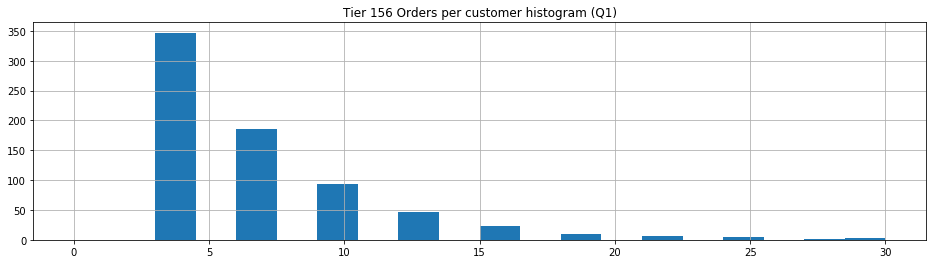

,ORDERS
count,725.000000
mean,6.347586
std,5.255937
min,3.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,69.000000


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  43.59  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  34.9  % from our customers
With CM2% threshold >=  0.4259999999999996  and Orders >=  3.0  we keep eligible a  69.93  % from our customers
                                                                                                                    
                                                                                                                    


In [20]:
for tq in tiers:
    data_tier = sim[sim['TIER'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2%'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2%'].fillna(0).describe()))
    perc_30_cm2_rel = data_tier['CM2%'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2%'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2%'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2'].hist(bins=400, range=(-50, 150))
    title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2'].describe()))
    perc_30_cm2_abs = data_tier['CM2'].fillna(0).quantile(.3)
    val1 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val2 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val3 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=20, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram (Q1)'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe()))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2%'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2%'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2%'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [21]:
(data['SALES'] / data['NET_SALES']).describe()

count    137777.000000
mean          1.190430
std           0.062884
min          -0.115919
25%           1.199964
50%           1.200000
75%           1.200027
max           1.250050
dtype: float64